14468
Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


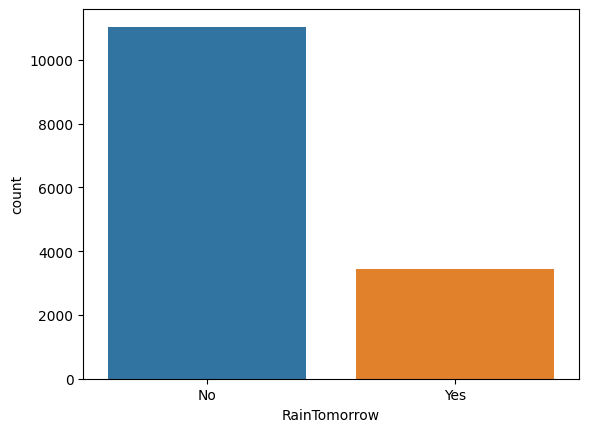

No     11038
Yes     3430
Name: RainTomorrow, dtype: int64


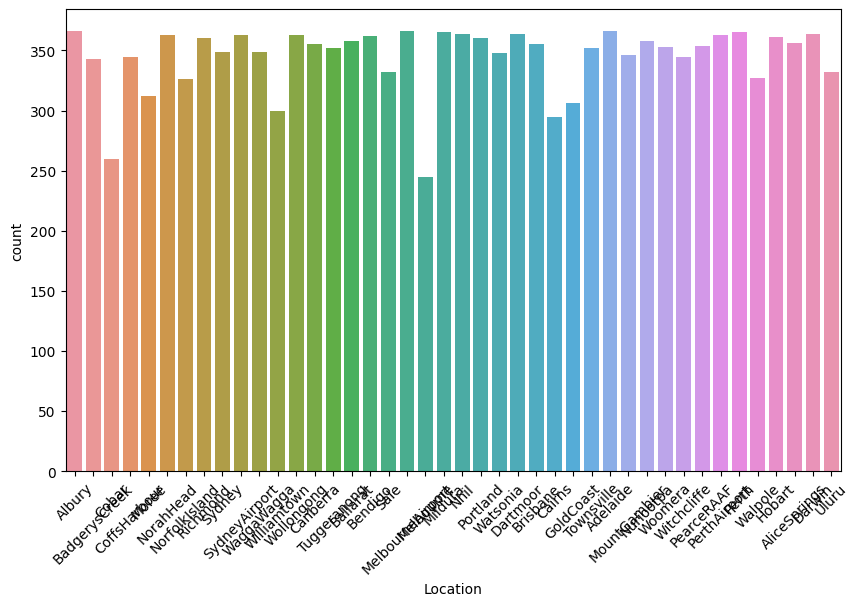

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv', sep=';')
print(df.shape[0])
print(df.isna().sum())

sns.countplot(df, x='RainTomorrow')
plt.show()
print(df['RainTomorrow'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(df, x='Location')
plt.xticks(rotation = 45)
plt.show()

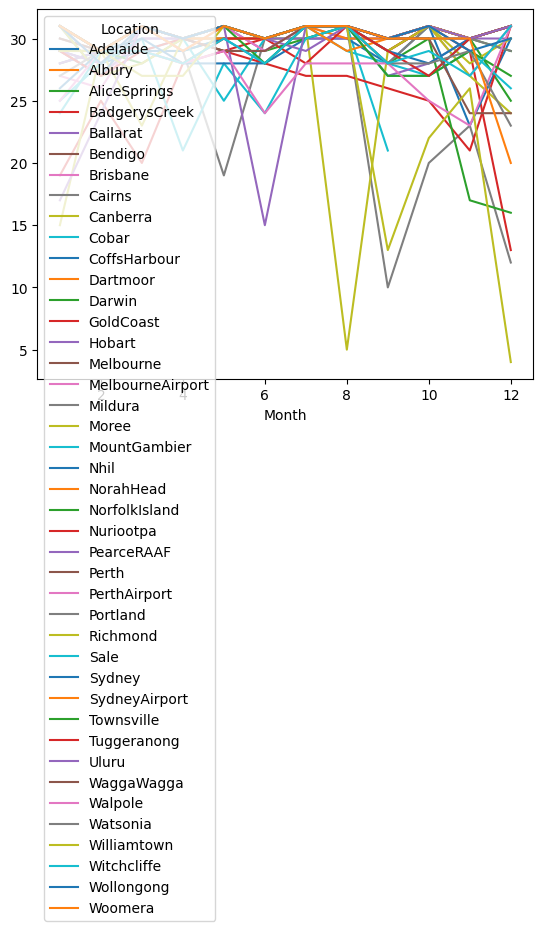

In [24]:
for i in df['Location'].unique():
    df_city = df[df['Location'] == i]
    # plt.title(i)
    # sns.countplot(df_city, x='Month', palette='ocean')
    # plt.show()
df.groupby(['Month','Location']).size().unstack().plot.line()
plt.show()

In [46]:
df_group = df.groupby(['Location','Month'])['Humidity9am', 'Humidity3pm']
# print(df_group.size().unstack())
humin = df_group.min().unstack()
humax = df_group.max().unstack()
print(humax)
print(humin)

                 Humidity9am                                                   \
Month                     1      2      3      4      5      6      7      8    
Location                                                                        
Adelaide                86.0   73.0   93.0   84.0   93.0   96.0   97.0   96.0   
Albury                  96.0   88.0   98.0  100.0  100.0  100.0  100.0  100.0   
AliceSprings            98.0   61.0   98.0   49.0   94.0   97.0   83.0   97.0   
BadgerysCreek          100.0   95.0  100.0  100.0  100.0  100.0  100.0  100.0   
Ballarat               100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
Bendigo                 94.0   79.0   89.0   92.0   97.0   98.0   99.0   99.0   
Brisbane                86.0   75.0   90.0   85.0   92.0   93.0   97.0   89.0   
Cairns                  87.0   86.0   95.0   98.0   86.0   97.0   97.0   97.0   
Canberra                94.0   96.0   99.0   93.0   99.0   99.0   99.0   99.0   
Cobar                   76.0

C:\Users\Computer\AppData\Local\Temp\ipykernel_13124\3614533556.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group = df.groupby(['Location','Month'])['Humidity9am', 'Humidity3pm']


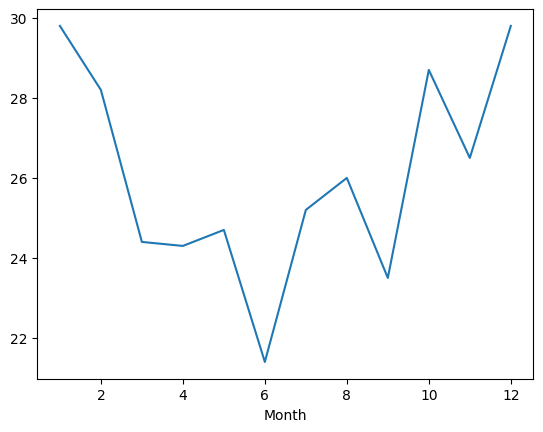

In [39]:
df['TemperatureRange'] = df['MaxTemp'] - df['MinTemp']
df['TemperatureRange']
df_group1 = df.groupby('Month')['TemperatureRange']
df_group1.max().plot.line()
plt.show()